/var/folders/w6/gkpzzsjx0n101092kzm2dnh00000gn/T/ipykernel_97318/2889856059.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  seaborn.heatmap(covari_floats.corr().abs(),


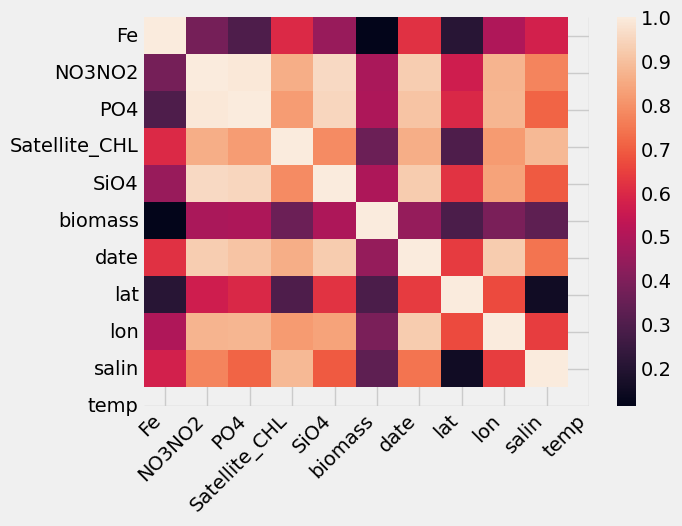

/var/folders/w6/gkpzzsjx0n101092kzm2dnh00000gn/T/ipykernel_97318/3766957071.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corvari_corr = covari_floats.corr().abs().unstack()


lon            NO3NO2           0.564313
NO3NO2         lon              0.564313
temp           Fe               0.575928
Fe             temp             0.575928
lon            PO4              0.595871
PO4            lon              0.595871
Satellite_CHL  Fe               0.601186
Fe             Satellite_CHL    0.601186
               lat              0.616911
lat            Fe               0.616911
SiO4           lon              0.621488
lon            SiO4             0.621488
lat            lon              0.637244
lon            lat              0.637244
salin          temp             0.642609
temp           salin            0.642609
salin          lon              0.665494
lon            salin            0.665494
SiO4           temp             0.693122
temp           SiO4             0.693122
PO4            temp             0.712132
temp           PO4              0.712132
lat            temp             0.742634
temp           lat              0.742634
NO3NO2         t

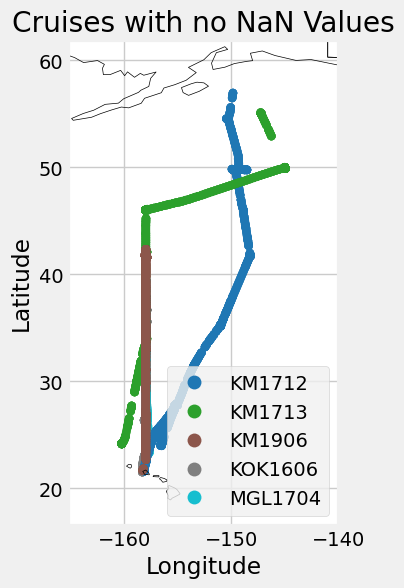

In [145]:
%run 03_data-QAQC.ipynb

# Developing a Random Forest Regressor for Each Population to Predict Biomass (pgC per L)

## Functions:

In [146]:
#function to make numpy array
def to_np(pop_feat):
    pop_feat = np.array(pop_feat)
    return pop_feat



In [159]:
import seaborn as sns

## Seperating dataframes for individual populations

In [148]:
covari.head(3)

,date,PopulationName,lat,lon,biomass,salin,temp,cruisename,NO3NO2,PO4,Fe,SiO4,Satellite_CHL
0,2016-04-20 07:00:00,Prochlorococcus,21.520326,-158.326984,10.520443,34.893785,24.351745,KOK1606,8.033585e-07,0.346238,0.000083,10.145326,0.03536
1,2016-04-20 07:00:00,Synechococcus,21.520326,-158.326984,0.341429,34.893785,24.351745,KOK1606,8.033585e-07,0.346238,0.000083,10.145326,0.03536
2,2016-04-20 07:00:00,non_pro_syn,21.520326,-158.326984,3.338212,34.893785,24.351745,KOK1606,8.033585e-07,0.346238,0.000083,10.145326,0.03536


In [162]:
covari.PopulationName.unique()

array(['Prochlorococcus', 'Synechococcus', 'non_pro_syn'], dtype=object)

In [163]:
import numpy as np
#function to make numpy array
def to_np(pop_feat):
    pop_feat = np.array(pop_feat)
    return pop_feat

In [164]:
pro_covari = covari[covari.PopulationName == 'Prochlorococcus']
syn_covari = covari[covari.PopulationName == 'Synechococcus']
non_covari = covari[covari.PopulationName == 'non_pro_syn']


pop_covari_list = [pro_covari, syn_covari, non_covari]
# creating the labels for all of the populations for biomass (using numpy array so we can predict on them)

label_pro = np.array(pro_covari.biomass)
label_syn = np.array(syn_covari.biomass)
label_non = np.array(non_covari.biomass)

# Creating the features for all of the populations

#these are the dropped features
droped_features = ['date','PopulationName',
                   'biomass', 'SiO4', 'cruisename', 'lat', 'lon']

features_pro = pro_covari.drop(droped_features, axis = 1)
features_syn = syn_covari.drop(droped_features, axis = 1)
features_non = non_covari.drop(droped_features, axis = 1)


# Saving feature names for later use (doesn't matter which dataframe we use since they all have same column names)
feature_list = list(features_pro.columns)
# Convert to numpy array
pop_features = [features_pro,features_syn,features_non]


features_pro = to_np(features_pro)
features_syn = to_np(features_syn)
features_non = to_np(features_non)

#creating labels to see how the model did
label_pro = np.array(pro_covari.biomass)
label_syn = np.array(syn_covari.biomass)
label_non = np.array(non_covari.biomass)

In [167]:
min(pro_covari.lat)

21.52032632

<Axes: xlabel='lat', ylabel='biomass'>

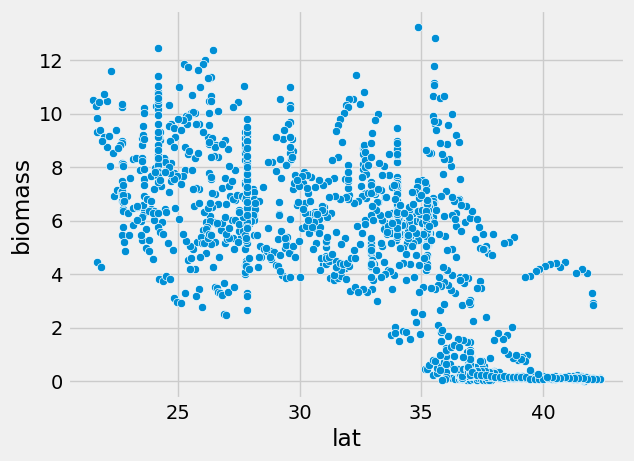

In [165]:
sns.scatterplot(data=pro_covari, x='lat', y='biomass')

In [153]:
#loading packages for random forest modeling

from sklearn.model_selection import train_test_split
import joblib

## RF Regressor for Prochlorococcus

In [155]:
# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets"
train_features_pro, test_features_pro, train_labels_pro, test_labels_pro = train_test_split(features_pro, label_pro, test_size = 0.3, random_state = 42)

In [156]:
# Looking at the shape of the features and labels to see if they match up
print('Training Features Shape:', train_features_pro.shape)
print('Training Labels Shape:', train_labels_pro.shape)
print('Testing Features Shape:', test_features_pro.shape)
print('Testing Labels Shape:', test_labels_pro.shape)

Training Features Shape: (939, 6)
Training Labels Shape: (939,)
Testing Features Shape: (403, 6)
Testing Labels Shape: (403,)


In [157]:
# We are using a regressor RF model because we are predicting on continous values
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf_pro= RandomForestRegressor(n_estimators = 100, random_state = 42)
# Use the Training data to build the model
rf_pro.fit(train_features_pro, train_labels_pro)
#saving the model
joblib.dump(rf_pro, "/Users/cristianswift/Desktop/Spring-Quarter-2022-2023/SeniorThesis/RF_models/random_forest_pro.joblib")

['/Users/cristianswift/Desktop/Spring-Quarter-2022-2023/SeniorThesis/RF_models/random_forest_pro.joblib']

### Predicting and Testing for Prochlorococus

In [158]:
# Use the forest's predict method on the test data
predictions_pro = rf_pro.predict(test_features_pro)
# Calculate the absolute errors
errors = abs(predictions_pro - test_labels_pro)
# Print out the mean absolute error (mae)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_labels_pro, predictions_pro)
print('Mean Absolute Error:', round(mae, 2), 'pgC per L.')
mape = np.mean(100 * (errors / test_labels_pro))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.69 pgC per L.
Accuracy: 72.34 %.


In [142]:
feature_list

['salin', 'temp', 'NO3NO2', 'PO4', 'Fe', 'Satellite_CHL']

In [143]:
# Get numerical feature importances
importances = list(rf_pro.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

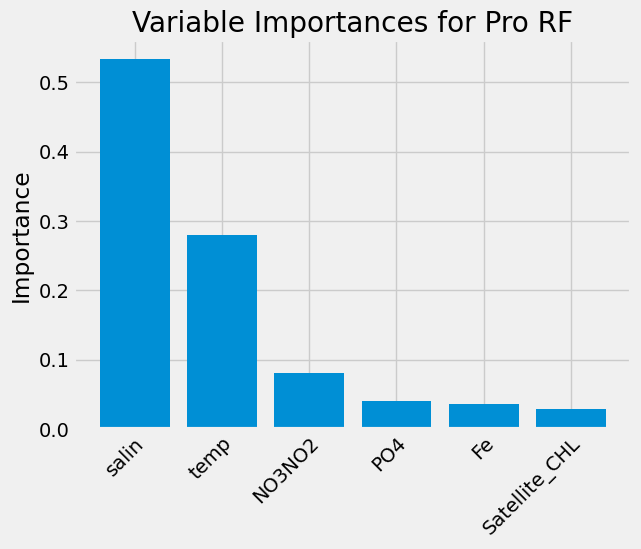

In [144]:
pro_feature_importance = pd.DataFrame(rf_pro.feature_importances_, index=feature_list).sort_values(by=0, ascending=False)

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# Make a bar chart
plt.bar(x=pro_feature_importance.index,height=pro_feature_importance[0], orientation = 'vertical')
# Tick labels for x axis
plt.xticks(pro_feature_importance.index, feature_list, rotation=45, ha='right', rotation_mode='anchor')

# Axis labels and title
plt.ylabel('Importance'); plt.title('Variable Importances for Pro RF');

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_actual_and_predicted_values(features, feature_list, label, test_features, predictions, title):
    # latitudes of training values
    lat = features[:, feature_list.index('lat')]
    # Dataframe with true values and dates
    true_data = pd.DataFrame(data={'lat': lat, 'actual': label})
    # latitudes of predictions
    test_lats = test_features[:, feature_list.index('lat')]
    # Dataframe with predictions and dates
    predictions_data = pd.DataFrame(data={'lat': test_lats, 'prediction': predictions})

    # Create a new figure and axis
    fig, ax = plt.subplots()

    # Plot the actual values as a blue line
    ax.plot(true_data['lat'], true_data['actual'], linewidth=2, color='blue', label='Actual')

    # Plot the predicted values as red dots
    ax.plot(predictions_data['lat'], predictions_data['prediction'], 'ro', markersize=4, label='Prediction')

    # Set x-axis tick rotation
    ax.tick_params(axis='x', rotation=60)

    # Add gridlines
    ax.grid(True, linestyle='--', alpha=0.5)

    # Set axis labels
    ax.set_xlabel('Latitude (º)')
    ax.set_ylabel('Biomass (pgC per L)')

    # Set the title
    ax.set_title(title)

    # Add a legend
    ax.legend()

    # Display the plot
    plt.show()


In [109]:
# import pandas as pd
# import matplotlib.pyplot as plt

# def plot_actual_and_predicted_values(features, feature_list, label, test_features, predictions, title, lat_df):
#     # Get the indices of the original data frame
#     indices = feature_list.index

#     # Create a new data frame with indices, predicted values, and labels
#     results_df = pd.DataFrame({'index': indices, 'prediction': predictions, 'label': label})

#     # Merge latitude column from lat_df based on the index
#     results_df = pd.merge(results_df, lat_df, left_on='index', right_index=True)

#     # Create a new figure and axis
#     fig, ax = plt.subplots()

#     # Plot the actual values as a blue line
#     ax.plot(results_df['lat'], results_df['label'], linewidth=2, color='blue', label='Actual')

#     # Plot the predicted values as red dots
#     ax.plot(results_df['lat'], results_df['prediction'], 'ro', markersize=4, label='Prediction')

#     # Set x-axis tick rotation
#     ax.tick_params(axis='x', rotation=60)

#     # Add gridlines
#     ax.grid(True, linestyle='--', alpha=0.5)

#     # Set axis labels
#     ax.set_xlabel('Latitude (º)')
#     ax.set_ylabel('Biomass (pgC per L)')

#     # Set the title
#     ax.set_title(title)

#     # Add a legend
#     ax.legend()

#     # Display the plot
#     plt.show()


In [110]:
# plot_actual_and_predicted_values(features_pro, feature_list, label_pro, test_features_pro, predictions_pro, 
#                                 title ='Actual and Predicted Values of Prochlorococcus Biomass')

ValueError: 'lat' is not in list

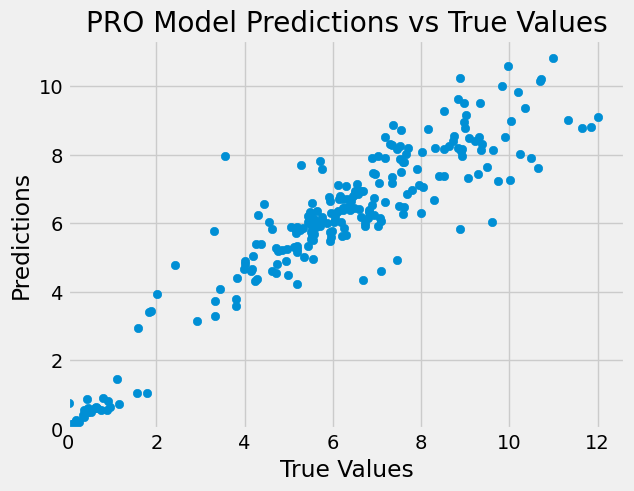

In [111]:
fig, ax = plt.subplots()
ax.scatter(test_labels_pro, predictions_pro)
ax.set_title('PRO Model Predictions vs True Values')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)

ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')

plt.show()

# run the model on each individual populaton - see which does best
#put zero values when 

## training and Testing SYN

In [112]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets"
train_features_syn, test_features_syn, train_labels_syn, test_labels_syn = train_test_split(features_syn, label_syn, test_size = 0.25, random_state = 42)

In [113]:
# Looking at the shape of the features and labels to see if they match up
print('Training Features Shape:', train_features_syn.shape)
print('Training Labels Shape:', train_labels_syn.shape)
print('Testing Features Shape:', test_features_syn.shape)
print('Testing Labels Shape:', test_labels_syn.shape)

Training Features Shape: (1389, 6)
Training Labels Shape: (1389,)
Testing Features Shape: (464, 6)
Testing Labels Shape: (464,)


In [114]:
# We are using a regressor RF model because we are predicting on continous values
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf_syn = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Use the Training data to build the model
rf_syn.fit(train_features_syn, train_labels_syn);
#saving the model
# joblib.dump(rf_syn, "/Users/cristianswift/Desktop/Spring-Quarter-2022-2023/SeniorThesis/RF_models/random_forest_syn.joblib")

In [115]:
# Use the forest's predict method on the test data
predictions_syn = rf_syn.predict(test_features_syn)
# Calculate the absolute errors
errors = abs(predictions_syn - test_labels_syn)
# Print out the mean absolute error (mae)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_labels_syn, predictions_syn)
print('Mean Absolute Error:', round(mae, 2), 'pgC per L.')
mape = np.mean(100 * (errors / test_labels_syn))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.52 pgC per L.
Accuracy: -55.05 %.


In [116]:
# Get numerical feature importances
importances = list(rf_syn.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

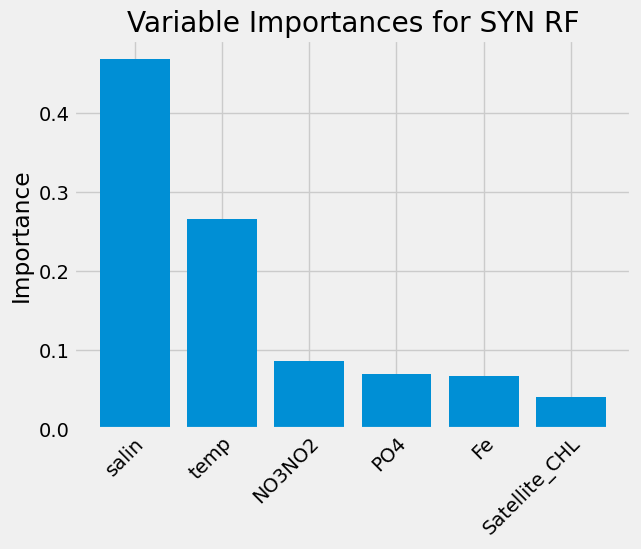

In [117]:
syn_feature_importance = pd.DataFrame(rf_syn.feature_importances_, index=feature_list).sort_values(by=0, ascending=False)

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# Make a bar chart
plt.bar(x=syn_feature_importance.index,height=syn_feature_importance[0], orientation = 'vertical')
# Tick labels for x axis
plt.xticks(syn_feature_importance.index, feature_list, rotation=45, ha='right', rotation_mode='anchor')

# Axis labels and title
plt.ylabel('Importance'); plt.title('Variable Importances for SYN RF');

(0.0, 43.0880064671)

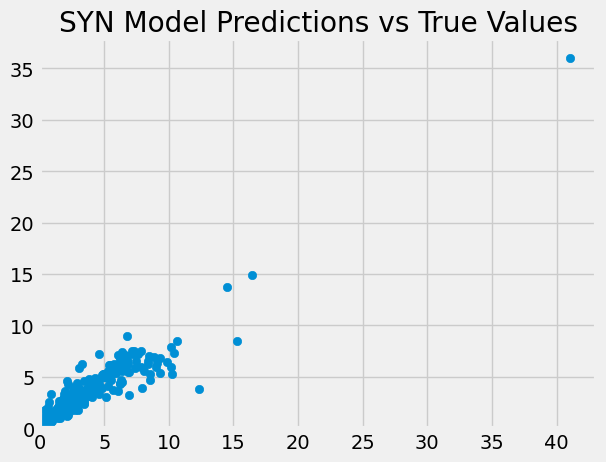

In [118]:
fig, ax = plt.subplots()
ax.scatter(test_labels_syn, predictions_syn)
ax.set_title('SYN Model Predictions vs True Values')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)


# run the model on each individual populaton - see which does best
#put zero values when 

In [ ]:
# plot_actual_and_predicted_values(features_syn, feature_list, label_syn, test_features_syn, predictions_syn, 
#                                 title ='Actual and Predicted Values of Synechococcus Biomass')

fig, ax = plt.subplots()
ax.scatter(test_labels_syn, predictions_syn)


p1 = max(max(predictions_syn), max(label_syn))
p2 = min(min(predictions_syn), min(label_syn))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## RF Regressor for Non Pro or Syn

In [119]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets"
train_features_non, test_features_non, train_labels_non, test_labels_non = train_test_split(features_non, label_non, test_size = 0.25, random_state = 42)

In [120]:
# Looking at the shape of the features and labels to see if they match up
print('Training Features Shape:', train_features_non.shape)
print('Training Labels Shape:', train_labels_non.shape)
print('Testing Features Shape:', test_features_non.shape)
print('Testing Labels Shape:', test_labels_non.shape)

Training Features Shape: (2779, 6)
Training Labels Shape: (2779,)
Testing Features Shape: (927, 6)
Testing Labels Shape: (927,)


In [121]:
# We are using a regressor RF model because we are predicting on continous values
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf_non = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Use the Training data to build the model
rf_non.fit(train_features_non, train_labels_non);
# joblib.dump(rf_non, "/Users/cristianswift/Desktop/Spring-Quarter-2022-2023/SeniorThesis/RF_models/random_forest_non_pro_syn.joblib")

In [122]:
# Use the forest's predict method on the test data
predictions_non = rf_non.predict(test_features_non)
# Calculate the absolute errors
errors = abs(predictions_non - test_labels_non)
# Print out the mean absolute error (mae)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_labels_non, predictions_non)
print('Mean Absolute Error:', round(mae, 2), 'pgC per L.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels_non)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.93 pgC per L.
Accuracy: -56.85 %.


In [123]:
# Get numerical feature importances
importances = list(rf_non.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

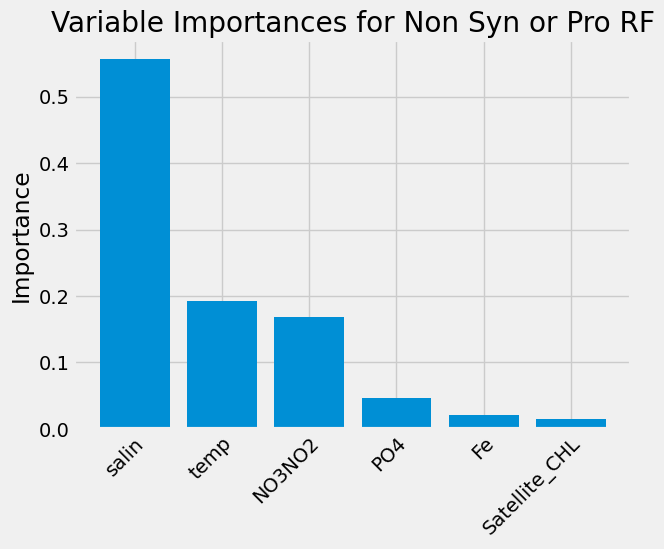

In [124]:
non_feature_importance = pd.DataFrame(rf_non.feature_importances_, index=feature_list).sort_values(by=0, ascending=False)

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# Make a bar chart
plt.bar(x=non_feature_importance.index,height=non_feature_importance[0], orientation = 'vertical')
# Tick labels for x axis
plt.xticks(non_feature_importance.index, feature_list, rotation=45, ha='right', rotation_mode='anchor')

# Axis labels and title
plt.ylabel('Importance'); plt.title('Variable Importances for Non Syn or Pro RF');

(0.0, 52.102393322)

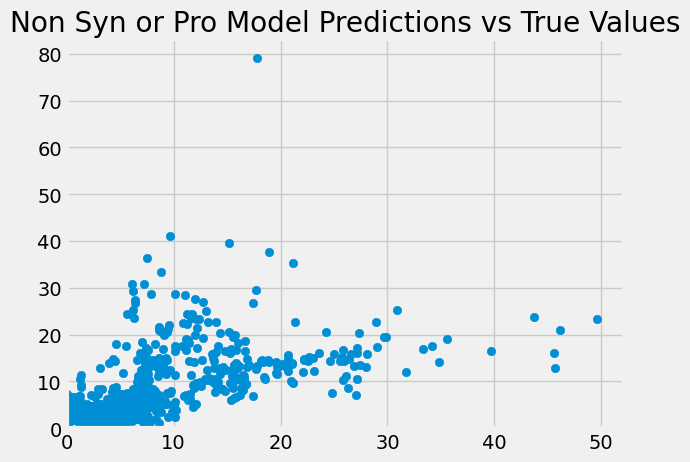

In [125]:
fig, ax = plt.subplots()
ax.scatter(test_labels_non, predictions_non)
ax.set_title('Non Syn or Pro Model Predictions vs True Values')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)


# run the model on each individual populaton - see which does best
#put zero values when 

In [ ]:
plot_actual_and_predicted_values(features_non, feature_list, label_non, test_features_non, predictions_non, 
                                title ='Actual and Predicted Values of Non Pro or Syn Biomass')